In [1]:
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from typing import List, Any

cwd = pathlib.Path.cwd()

In [2]:
data = pd.read_csv(cwd / ".data" / "2025"/ "prices.txt", sep=r"\s+", names=[i for i in range(50)])
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,36.49,51.34,45.11,29.37,39.73,28.69,17.89,47.71,40.70,58.56,...,75.13,46.74,39.54,32.21,75.55,30.62,85.74,16.13,81.57,31.53
746,36.30,50.95,44.66,29.32,39.85,28.59,17.84,47.31,40.32,58.05,...,75.06,47.19,39.32,32.92,75.97,30.87,85.88,15.91,80.50,31.65
747,36.58,50.80,44.25,29.17,40.01,28.97,17.76,47.01,39.97,57.61,...,74.97,47.52,39.58,33.31,76.05,30.83,86.15,15.81,80.93,31.83
748,36.43,51.19,44.02,29.11,40.01,28.54,17.69,45.68,39.86,59.06,...,75.36,48.15,39.94,32.95,75.38,30.81,86.42,15.75,80.80,31.78


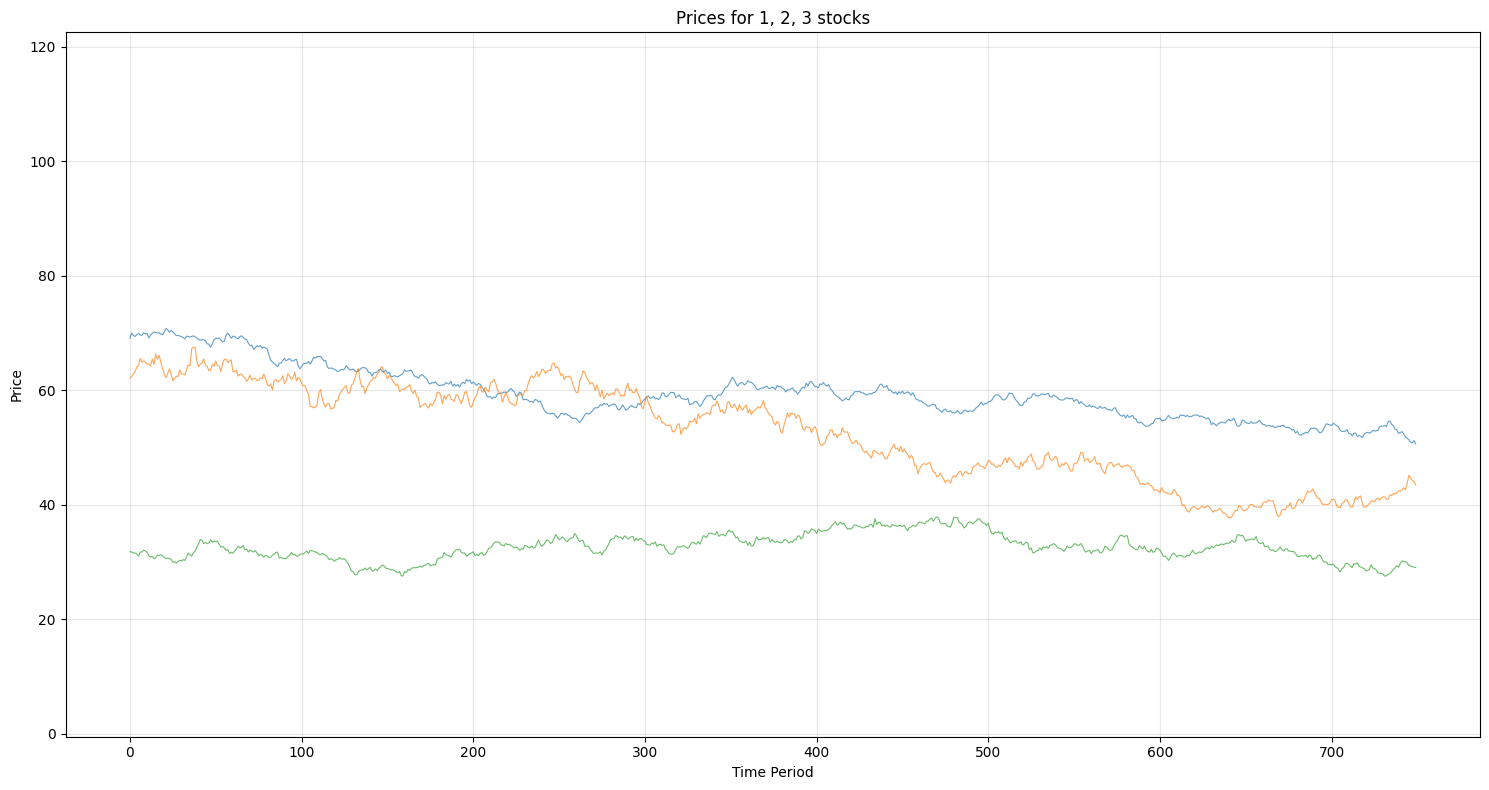

In [5]:
def plot_stock(data=data, stocks=None):
    plt.figure(figsize=(15, 8))
    try:
        if stocks is None:
            cols = data.columns
        else:
            cols = stocks
        
        for col in cols:
            plt.plot(data[col], alpha=0.7, linewidth=0.8)

        col_names = [str(col) for col in cols]
        plt.title(f"Prices for {', '.join(col_names) if stocks else 'all'} stocks")
        
        # Fixed ylim based on entire dataset
        data_min = data.min().min()  # Min across entire dataset
        data_max = data.max().max()  # Max across entire dataset
        margin = 0.1 * (data_max - data_min)  # 10% margin
        
        plt.ylim(data_min - margin, data_max + margin)
        plt.xlabel('Time Period')
        plt.ylabel('Price')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        return e

# Test it
plot_stock(data, [1,2,3])

In [6]:
# Identifying leaders and laggards
# Create pairs, 1225 pairs
# Find a way to calculate similarity metrics for it
# Try CCF

# Standardize the data
# Pairwise calculate ccf
# Save to dictionary, (num1, num2): (corr, lag)
from scipy.signal import correlate
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import ccf
import itertools

correlations = {}

data_normalized = data.copy()

for column in data_normalized.columns:
    data_normalized[column] = (data_normalized[column] - data_normalized[column].mean()) / data_normalized[column].std() 

for col1 in range(0, 50):
    for col2 in range(col1, 50):
        if col1 != col2:
            corr = ccf(data_normalized[col1], data_normalized[col2], adjusted=False)
            corr_max_val = round(corr.max(), 5)
            corr_max_idx = int(corr.argmax())
            key = (col1, col2)
            correlations[key] = (corr_max_val, corr_max_idx)

sorted_items = sorted(correlations.items(), key = lambda x: x[1][0], reverse=True)

In [ ]:
# Visualize the highest 10 pairs
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Enhanced plot function with zoom capability
def plot_stock_with_zoom(data=data, stocks=None, zoom_mode=False):
    plt.figure(figsize=(15, 8))
    try:
        if stocks is None:
            cols = data.columns
        else:
            cols = stocks
        
        # Get the subset of data we're actually plotting
        plot_data = data[cols]
        
        if zoom_mode:
            # Normalize data in zoom mode (to starting value of 1)
            normalized_plot_data = plot_data / plot_data.iloc[0]
            
            for col in cols:
                plt.plot(normalized_plot_data[col], alpha=0.7, linewidth=0.8, label=f'Stock {col}')
            
            col_names = [str(col) for col in cols]
            plt.title(f"Normalized Prices for {', '.join(col_names)} stocks (ZOOMED)")
            
            # Fit to normalized data
            data_min = normalized_plot_data.min().min()
            data_max = normalized_plot_data.max().max()
            margin = 0.05 * (data_max - data_min)  # 5% margin when zoomed
            plt.ylim(data_min - margin, data_max + margin)
            plt.ylabel('Normalized Price (Starting Value = 1)')
            
            # Add legend for better identification in normalized view
            if len(cols) <= 5:  # Only show legend if not too many stocks
                plt.legend()
        else:
            # Raw data in full view mode
            for col in cols:
                plt.plot(data[col], alpha=0.7, linewidth=0.8)

            col_names = [str(col) for col in cols]
            plt.title(f"Prices for {', '.join(col_names)} stocks (FULL VIEW)")
            
            # Fixed viewport: entire dataset
            data_min = data.min().min()
            data_max = data.max().max()
            margin = 0.1 * (data_max - data_min)
            plt.ylim(data_min - margin, data_max + margin)
            plt.ylabel('Price')
        
        plt.xlabel('Time Period')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        return e
    
def interactive_plot_with_zoom(rank, zoom_mode):
    """Wrapper function for the interactive plot with zoom"""
    if rank >= len(sorted_items):
        print(f"Rank {rank} out of range")
        return
    
    pair_key, correlation_data = sorted_items[rank]
    stock1, stock2 = pair_key
    correlation_value, lag = correlation_data  # Unpack the tuple
    
    plot_stock_with_zoom(data=data, stocks=[stock1, stock2], zoom_mode=zoom_mode)
    zoom_status = "ZOOMED" if zoom_mode else "FULL VIEW"
    print(f"Rank: {rank+1}, Stocks: {stock1} & {stock2}, Correlation: {correlation_value:.4f}, Lag: {lag} days. [{zoom_status}]")

def create_interactive_plot_with_zoom():
    # Create widgets
    slider = widgets.IntSlider(
        value=0, 
        min=0, 
        max=len(sorted_items)-1, 
        step=1, 
        description="Rank:",
        style={'description_width': 'initial'}
    )
    
    zoom_toggle = widgets.ToggleButton(
        value=False,
        description='🔍 Zoom',
        disabled=False,
        button_style='warning',
        tooltip='Toggle between full view and zoomed view',
        layout=widgets.Layout(width='80px')
    )
    
    # Navigation buttons
    prev_button = widgets.Button(description='Decrement', layout=widgets.Layout(width='120px'))
    next_button = widgets.Button(description='Increment', layout=widgets.Layout(width='120px'))
    first_button = widgets.Button(description='To first rank', layout=widgets.Layout(width='120px'))
    last_button = widgets.Button(description='To last rank', layout=widgets.Layout(width='120px'))
    
    # Button handlers
    def on_prev_clicked(b):
        if slider.value > slider.min:
            slider.value -= 1
    
    def on_next_clicked(b):
        if slider.value < slider.max:
            slider.value += 1
            
    def on_first_clicked(b):
        slider.value = slider.min
        
    def on_last_clicked(b):
        slider.value = slider.max
    
    # Connect handlers
    prev_button.on_click(on_prev_clicked)
    next_button.on_click(on_next_clicked)
    first_button.on_click(on_first_clicked)
    last_button.on_click(on_last_clicked)
    
    # Create layouts
    nav_buttons = widgets.HBox([first_button, prev_button, next_button, last_button])
    controls = widgets.HBox([slider, zoom_toggle])
    all_controls = widgets.VBox([controls, nav_buttons])
    
    # Create interactive plot
    interactive_plot_widget = widgets.interactive(
        interactive_plot_with_zoom, 
        rank=slider, 
        zoom_mode=zoom_toggle
    )
    
    # Display
    display(widgets.VBox([all_controls, interactive_plot_widget.children[-1]]))

# Run it
create_interactive_plot_with_zoom()

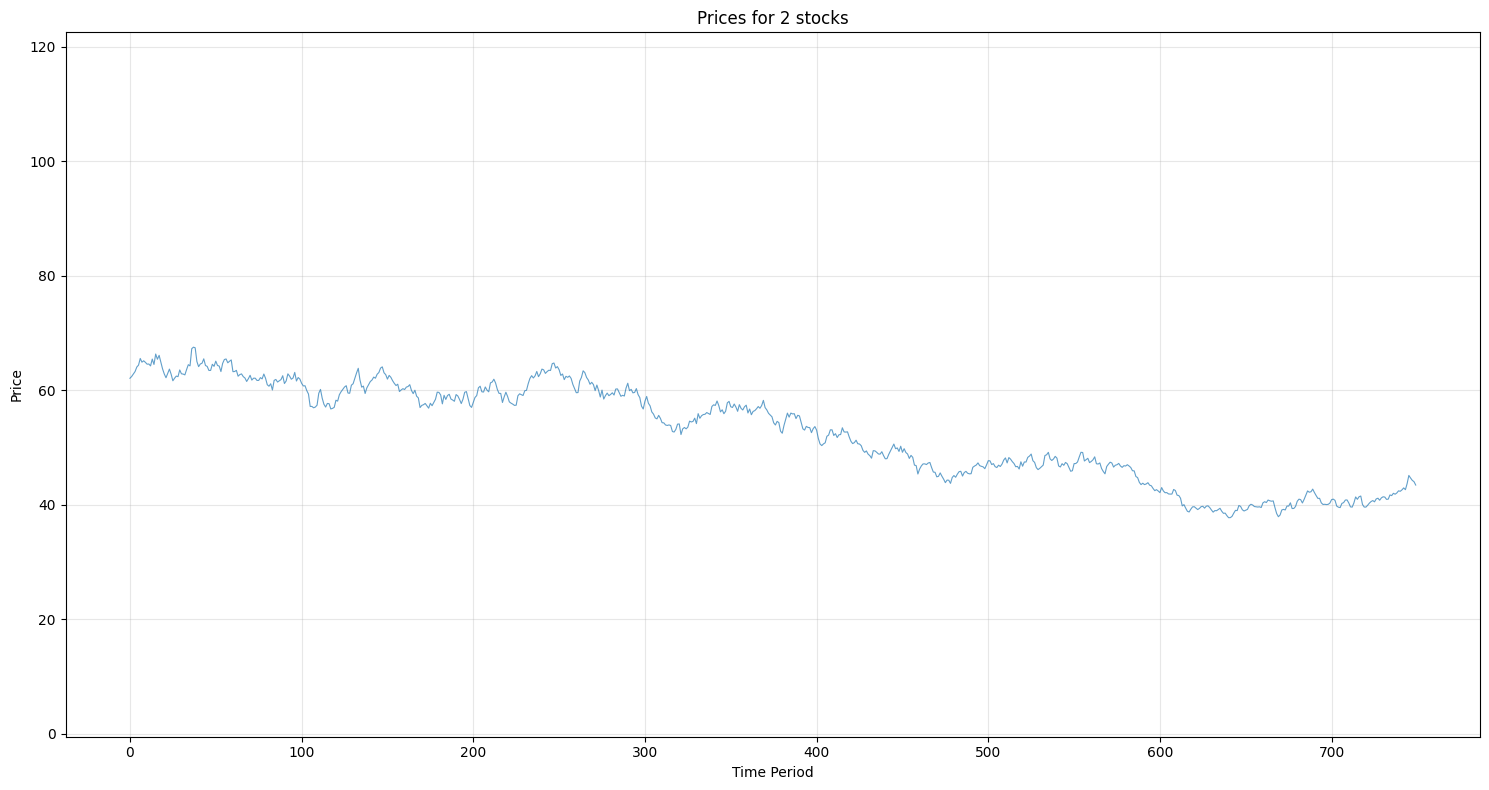

In [11]:
plot_stock(data = data, stocks = [2])